Predicting the Trend of Alphabet's Stock Price Using an LSTM with 50 Units
--


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
dataset_training = pd.read_csv('C:/Users/User/Desktop/Simple_Sentiment_Analysis/AMZN_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
training_data = dataset_training[['Open']].values
training_data

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

print(training_data_scaled)

[[0.06523313]
 [0.06494233]
 [0.06355099]
 ...
 [0.66704299]
 [0.67796271]
 [0.69931748]]


In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.06523313]
  [0.06494233]
  [0.06355099]
  ...
  [0.04147209]
  [0.03350041]
  [0.03173272]]

 [[0.06494233]
  [0.06355099]
  [0.06308912]
  ...
  [0.03350041]
  [0.03173272]
  [0.03307274]]

 [[0.06355099]
  [0.06308912]
  [0.06504497]
  ...
  [0.03173272]
  [0.03307274]
  [0.0306151 ]]

 ...

 [[0.99080806]
  [0.97826323]
  [0.96783389]
  ...
  [0.67319568]
  [0.60534525]
  [0.61839758]]

 [[0.97826323]
  [0.96783389]
  [0.94918773]
  ...
  [0.60534525]
  [0.61839758]
  [0.66704299]]

 [[0.96783389]
  [0.94918773]
  [0.93150521]
  ...
  [0.61839758]
  [0.66704299]
  [0.67796271]]]


In [9]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0061
Epoch 2/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0011
Epoch 3/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0011
Epoch 4/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0014
Epoch 5/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 7/100
38/38 [==============================] - 2s 55ms/step - loss: 9.5940e-04
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 9.0882e-04
Epoch 9/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0010
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0010
Epoch 11/100
38/38 [==============================] - 2s 66ms/step - loss: 9.0115e-04
Epoch 12/100
38/38 [==============================] - 3s 74ms/step - loss: 8.0198e-04
Epoch 13/

38/38 [==============================] - 2s 64ms/step - loss: 2.2383e-04
Epoch 97/100
38/38 [==============================] - 2s 66ms/step - loss: 2.1069e-04
Epoch 98/100
38/38 [==============================] - 2s 64ms/step - loss: 2.1507e-04
Epoch 99/100
38/38 [==============================] - 2s 65ms/step - loss: 1.8082e-04
Epoch 100/100
38/38 [==============================] - 2s 64ms/step - loss: 1.8715e-04


In [12]:
dataset_testing = pd.read_csv('C:/Users/User/Desktop/Simple_Sentiment_Analysis/AMZN_test.csv')
actual_stock_price = dataset_testing[['Open']].values
actual_stock_price

array([[1465.199951],
       [1520.01001 ],
       [1530.      ],
       [1602.310059],
       [1664.689941],
       [1652.97998 ],
       [1641.01001 ],
       [1640.550049],
       [1615.      ],
       [1632.      ],
       [1684.219971],
       [1680.      ],
       [1712.      ],
       [1681.      ],
       [1656.      ],
       [1641.069946],
       [1670.5     ],
       [1643.589966],
       [1631.27002 ],
       [1623.      ],
       [1692.849976]])

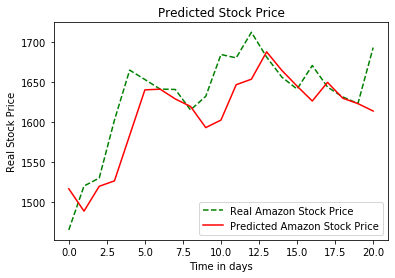

In [13]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Now visualize it!
plt.plot(actual_stock_price, color = 'green', label = 'Real Amazon Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()